In [1]:
import sys
sys.path.append("./algolibmodule")

In [2]:
%pip install session_info
from algolib import get_data
import session_info
session_info.show()

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Trabajo Profesional | Algo Trading | Libreria


In [3]:


rounds=14
ticker = 'BTC-USD'
start_date = '2000-01-01'
fast_period , slow_period = 20, 60
sigma = 40

data = get_data(ticker, start_date)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-11-20,37374.074219,37756.820312,36882.531250,37476.957031,20888209068
2023-11-21,37469.160156,37631.140625,35813.812500,35813.812500,25172163756
2023-11-22,35756.554688,37856.980469,35670.972656,37432.339844,24397247860


## Indicadores Estadisticos

### RSI

In [4]:
from indicators.rsi import RSI

rsi =RSI()
rsi.calculate(data,rounds)

Date
2014-09-17          NaN
2014-09-18     0.000000
2014-09-19     0.000000
2014-09-20    20.155072
2014-09-21    17.448333
                ...    
2023-11-20    64.994639
2023-11-21    53.172376
2023-11-22    60.669973
2023-11-23    59.761345
2023-11-24    61.166888
Name: RSI, Length: 3356, dtype: float64

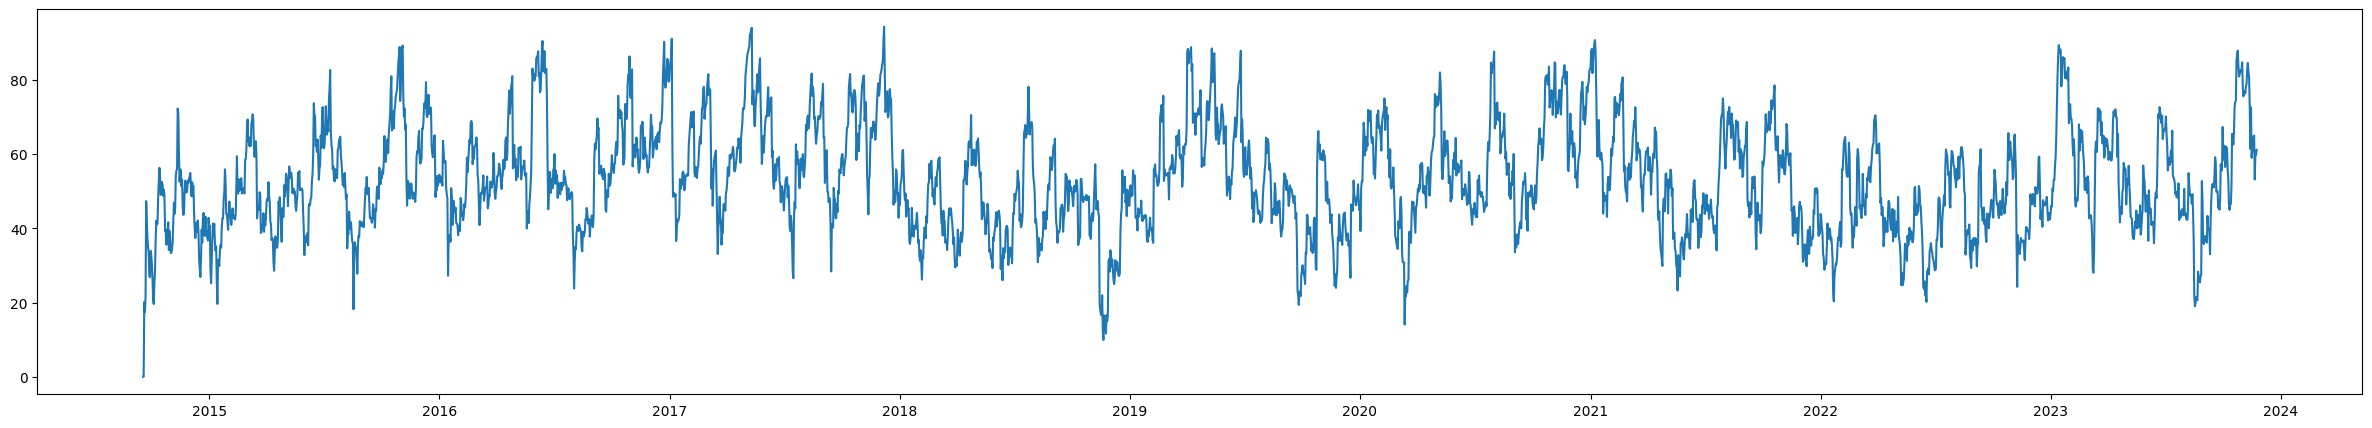

In [5]:
rsi.plot()

### MACD

In [6]:
from indicators.macd import MACD


macd = MACD()
macd.calculate(data,23, 12, 9)


Date
2014-09-17      0.00
2014-09-18     -0.29
2014-09-19     -0.76
2014-09-20     -0.47
2014-09-21     -0.54
               ...  
2023-11-20   -140.90
2023-11-21   -224.23
2023-11-22   -183.32
2023-11-23   -166.44
2023-11-24   -138.87
Name: MACD, Length: 3356, dtype: float64

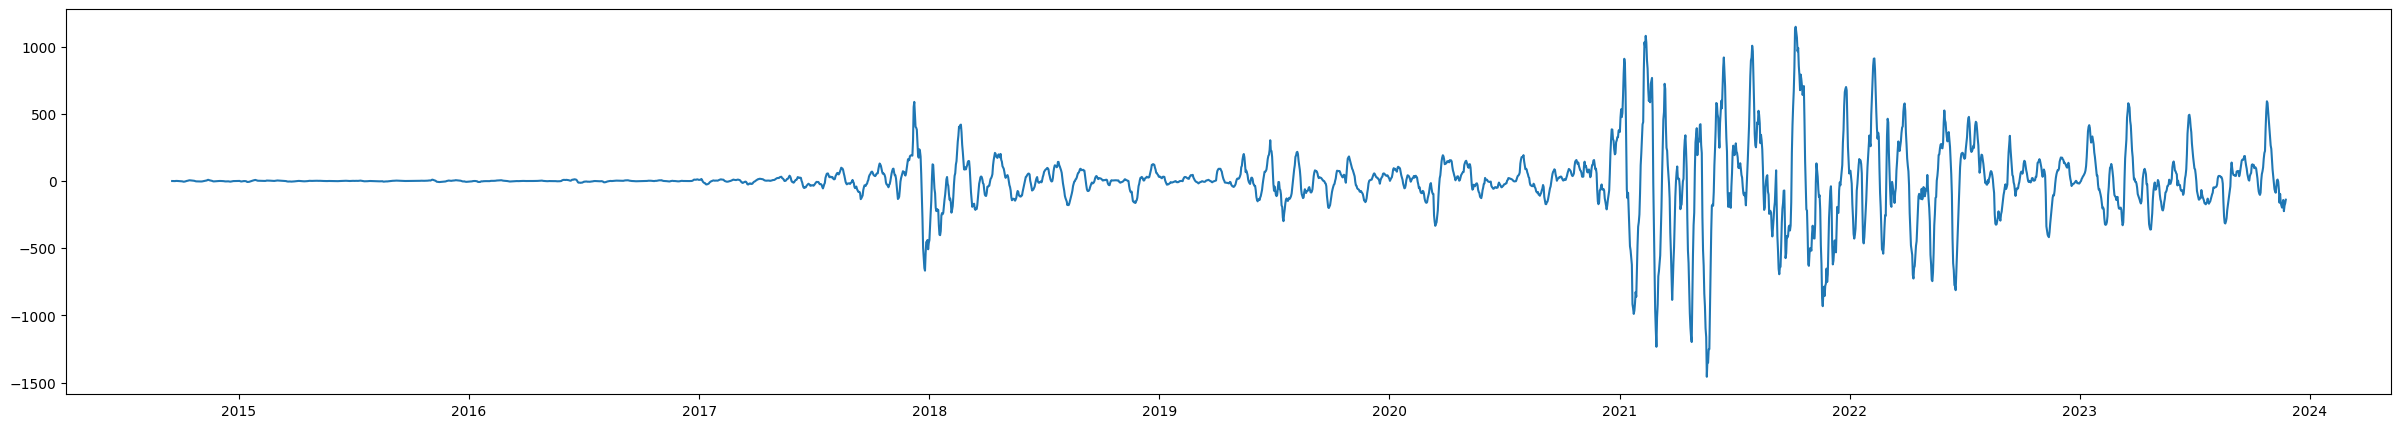

In [7]:
macd.plot()

In [8]:
from indicators.obv import OBV

obv = OBV()
obv.calculate(data,10)

Date
2014-09-17             NaN
2014-09-18             NaN
2014-09-19             NaN
2014-09-20             NaN
2014-09-21             NaN
                  ...     
2023-11-20   -2.266347e+10
2023-11-21   -3.391136e+10
2023-11-22    2.031605e+09
2023-11-23    6.874370e+09
2023-11-24    5.357584e+10
Name: OBV, Length: 3356, dtype: float64

In [9]:
#obv.plot()

Predict with RSI

In [10]:
data = get_data(ticker, "2022-01-01")
rsi = RSI()
rsi.calculate(data)
signals = rsi.calc_sell_signals()
print(f"{signals[-1:]}")
signals = rsi.calc_buy_signals()
print(f"{signals[-1:]}")
data = get_data(ticker, "2022-01-01")
historical_data_without_last = data.iloc[:-1]

rsi = RSI()

rsi_output = rsi.calculate(historical_data_without_last)

last_record = data.iloc[-1:]

signal = rsi.predict_signal(last_record)
print(f"{last_record}")
print(f"Signal for the last record: {signal}")

[*********************100%%**********************]  1 of 1 completed
Date
2022-01-01          NaN
2022-01-02     0.000000
2022-01-03     0.000000
2022-01-04     0.000000
2022-01-05     0.000000
                ...    
2023-11-20    64.994639
2023-11-21    53.172376
2023-11-22    60.669973
2023-11-23    59.761345
2023-11-24    61.244407
Name: RSI, Length: 693, dtype: float64
[False]
[False]
[*********************100%%**********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2023-11-24  37296.316406  38392.785156  37265.671875  37628.238281   

                 Volume  
Date                     
2023-11-24  22846269440  
Signal for the last record: Hold


In [11]:
from indicators.crossing import Crossing

data = get_data(ticker, "2022-01-01")
cross = Crossing()
cross.calculate(data)
signals = cross.calc_sell_signals()
print(f"{signals[-1:]}")
signals = cross.calc_buy_signals()
print(f"{signals[-1:]}")
data = get_data(ticker, "2022-01-01")
historical_data_without_last = data.iloc[:-1]

cross = Crossing()

rsi_output = cross.calculate(historical_data_without_last)

last_record = data.iloc[-1:]

signal = cross.predict_signal(last_record)
print(f"{last_record}")
print(f"Signal for the last record: {signal}")

[*********************100%%**********************]  1 of 1 completed
[False]
[ True]
[*********************100%%**********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2023-11-24  37296.316406  38392.785156  37265.671875  37628.238281   

                 Volume  
Date                     
2023-11-24  22846269440  
Signal for the last record: Hold
